# **Construindo uma distribuição de frequência com base em um conjunto de dados**

O conjunto de dados a seguir lista os preços (em dólares) de 30 aparelhos
GPS (global positioning system) portáteis.
Construa uma distribuição de frequência com sete classes.

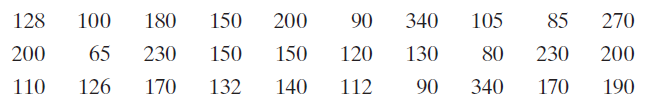

In [ ]:
import pandas as pd
data = pd.Series([128, 200, 110, 100, 65, 126, 180, 230, 170, 150, 
                  150, 132, 200, 150, 140, 90, 120, 112, 340, 130, 
                  90, 105, 80, 340, 85, 230, 170, 270, 200, 190])

print(data)
v_max = data.max()
v_min = data.min()
n_classes = 7


0     128
1     200
2     110
3     100
4      65
5     126
6     180
7     230
8     170
9     150
10    150
11    132
12    200
13    150
14    140
15     90
16    120
17    112
18    340
19    130
20     90
21    105
22     80
23    340
24     85
25    230
26    170
27    270
28    200
29    190
dtype: int64


# **Distribuição de Frequências**

O método value_counts registra a frequência de ocorrência dos dados em cada classe (o número de classes é dado pelo parâmetro bins). O método sort_index ordena os índices (classes) em ordem crescente.

In [ ]:
dist_freq = data.value_counts(bins=n_classes).sort_index()
print(dist_freq)

(64.72399999999999, 104.286]    6
(104.286, 143.571]              9
(143.571, 182.857]              6
(182.857, 222.143]              4
(222.143, 261.429]              2
(261.429, 300.714]              1
(300.714, 340.0]                2
dtype: int64


Note que as classes da distribuição de frequências não estão definidas de forma "amigável". Vamos alterar a definição dos intervalos de classe usando o método interval_range.

In [ ]:
from math import ceil
nova_dist_freq = pd.DataFrame(dist_freq)
nova_dist_freq = nova_dist_freq.reset_index()
nova_dist_freq.columns = ['Classe', 'Frequência']
amplitude = ceil((v_max - v_min)/n_classes)
classes = pd.interval_range(start = v_min, end = v_max + amplitude, freq = amplitude)
nova_dist_freq['Classe'] = classes
print(classes)
display(nova_dist_freq)

IntervalIndex([(65, 105], (105, 145], (145, 185], (185, 225], (225, 265], (265, 305], (305, 345]], dtype='interval[int64, right]')


,Classe,Frequência
0,"(65, 105]",6
1,"(105, 145]",9
2,"(145, 185]",6
3,"(185, 225]",4
4,"(225, 265]",2
5,"(265, 305]",1
6,"(305, 345]",2


# **Caracterísiticas adicionais da distribuição**

Vamos adicionar as colunas que exibam os pontos médios, a frequência relativa e a frequência acumnulada de cada classe.

In [ ]:
pts_medios = [classe.mid for classe in classes]
print(pts_medios)
nova_dist_freq['Pontos médios'] = pts_medios
n_dados = len(data)
nova_dist_freq['Freq relativa'] = nova_dist_freq['Frequência']/n_dados
nova_dist_freq['Freq Acum'] = nova_dist_freq['Frequência'].cumsum()
display(nova_dist_freq)

[85.0, 125.0, 165.0, 205.0, 245.0, 285.0, 325.0]


,Classe,Frequência,Pontos médios,Freq relativa,Freq Acum
0,"(65, 105]",6,85.0,0.200000,6
1,"(105, 145]",9,125.0,0.300000,15
2,"(145, 185]",6,165.0,0.200000,21
3,"(185, 225]",4,205.0,0.133333,25
4,"(225, 265]",2,245.0,0.066667,27
5,"(265, 305]",1,285.0,0.033333,28
6,"(305, 345]",2,325.0,0.066667,30


# **Construção do histograma de frequências**

O histograma é construído usando o método hist do Pandas. Diversas características do histograma, tais como as classes (parâmetro bins), cor das barras e marcações nos eixos vertical e horizontal são programáveis. Também é inserida a frequência observada no topo de cada barra.

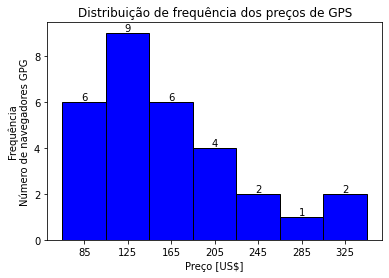

In [ ]:
histograma = data.hist(bins = [classe.left for classe in classes]+
                       [nova_dist_freq['Classe'][n_classes-1].right], 
                       color='blue', edgecolor='black', grid=False)
histograma.set(xlabel='Preço [US$]',
               ylabel='Frequência\nNúmero de navegadores GPG',
               title = 'Distribuição de frequência dos preços de GPS',
               xticks = pts_medios)
#Opcional - Inserção de Frequência nas barras
barras = histograma.patches
freqs = nova_dist_freq['Frequência']
for barra, freq in zip(barras, freqs):
  altura = barra.get_height()
  histograma.text(barra.get_x()+barra.get_width()/2, altura,
                  freq, ha='center', va='bottom')

# **Construção do polígono de frequências**

Para construir o polígono de frequências, vamos empregar a biblioteca matplotlib.

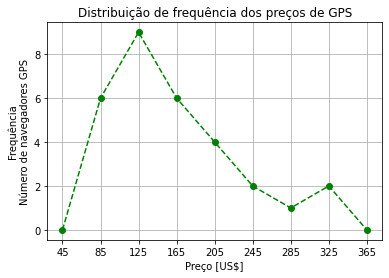

In [ ]:
import matplotlib.pyplot as plt
fic_esq = [pts_medios[0]-amplitude]
fic_dir = [pts_medios[-1]+amplitude]
x_data = fic_esq + pts_medios + fic_dir
y_data = [0] + list(nova_dist_freq['Frequência']) + [0]
plt.plot(x_data, y_data, 'go--')
plt.xlabel('Preço [US$]')
plt.ylabel('Frequência\nNúmero de navegadores GPS')
plt.title('Distribuição de frequência dos preços de GPS')
plt.xticks(x_data)
plt.grid()